# ***Diabetes Prediction***

**Import Libraries**

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

**Import & Analyse Data**

In [53]:
diab_data= pd.read_csv('/content/diabetes.csv')
diab_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
diab_data.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [54]:
print(diab_data.isnull().sum())
diab_data.dropna(inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [55]:
diab_data.drop(columns=['Insulin','SkinThickness','Pregnancies'],inplace=True)
y= diab_data['Outcome']
X= diab_data.drop(columns='Outcome',inplace=False,axis=0)
diab_data


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,76,32.9,0.171,63,0
764,122,70,36.8,0.340,27,0
765,121,72,26.2,0.245,30,0
766,126,60,30.1,0.349,47,1


In [70]:
X_train,X_valid,y_train,y_valid= train_test_split(X,y,test_size=0.2,random_state=0)

**ML model**

In [80]:
model= Sequential([
    Dense(200,activation='relu',input_shape=[5]),
    BatchNormalization(),
    Dense(200,activation='relu'),
    BatchNormalization(),
    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)


In [81]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=25,
    epochs=100,
    #callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.4134
Best Validation Accuracy: 0.8571


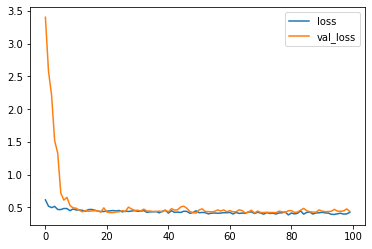

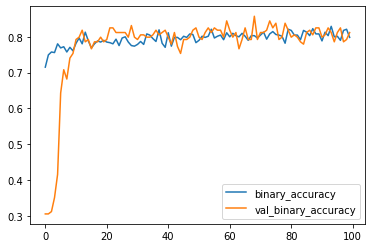

In [82]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

**Save model**

In [86]:
model.save("diabetes.h5")
loaded_model = load_model("diabetes.h5")
loss, accuracy = loaded_model.evaluate(X_valid, y_valid)
print(loss,accuracy)

5/5 [==============================] - 0s 3ms/step - loss: 0.4364 - binary_accuracy: 0.8117
0.4364211857318878 0.8116883039474487


In [88]:
model_filename='diabetes.pkl'
pickle.dump(model, open(model_filename,'wb'))

INFO:tensorflow:Assets written to: ram://e30fac4d-a551-46d6-937c-efb68d1f03ec/assets
